In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from classificator import Classificator
from custom_pca import PCA_method, calc_variance_ratio
from matplotlib import pyplot as plt
np.random.seed(777)

In [2]:
n1, n2 = 500, 500
mu1, mu2 = np.array([1,2, 3]),  np.array([2,1,3])
cov = np.array([[0.5, 1, 0],
                [1, 2.5, 0],
                [0, 0, 1]])
    

x1, y1, x2, y2 = np.random.multivariate_normal(mu1, cov, n1), np.zeros(n1), np.random.multivariate_normal(mu2, cov, n2), np.ones(n2)

n = 200
x_train, x_test, y_train, y_test = train_test_split(np.vstack((x1, x2)), np.hstack((y1, y2)), test_size=n, random_state=1234)
print(len(x_train[y_train == 0]), len(x_train[y_train == 1]))


396 404


m/n P(2|1): 0.009615384615384616, P(1|2): 0.010416666666666666
Метрика P(2|1): 0.010282984646538642, P(1|2): 0.010049908930866


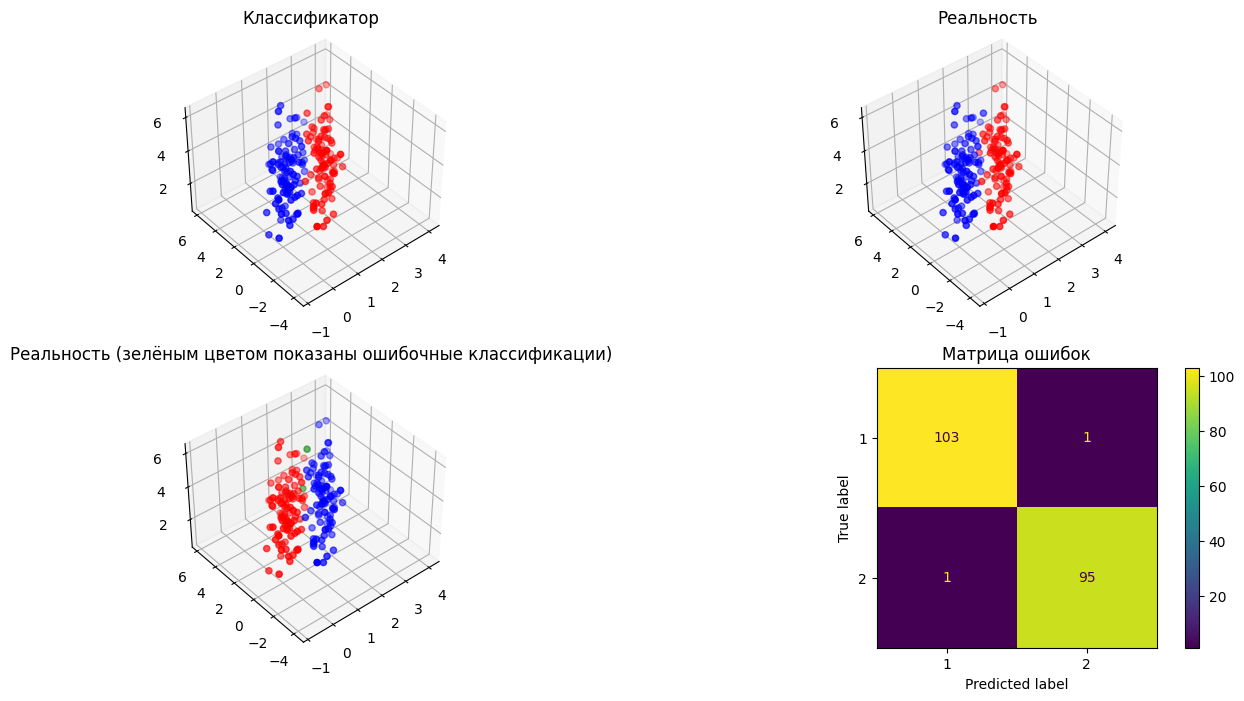

In [3]:
classificator = Classificator()
classificator.fit(x_train, y_train)
y_res = classificator.predict(x_test)
wrong_values_indx = np.where(np.not_equal(y_res, y_test))

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(2, 2, 1,projection='3d')
ax1.set_title('Классификатор')
ax1.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], color=['r' if i else 'b' for i in y_res])
ax1.view_init(40, -130)

ax2 = fig.add_subplot(2, 2, 2,projection='3d')
ax2.set_title('Реальность')
ax2.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], color=['r' if i else 'b' for i in y_test])
ax2.view_init(40, -130)

ax3 = fig.add_subplot(2,2,3,projection='3d')
ax3.set_title('Реальность (зелёным цветом показаны ошибочные классификации)')
ax3.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], color=['g' if np.isin(indx, wrong_values_indx) else ['r', 'b'][int(res)] for indx, res in enumerate(y_res)])
ax3.view_init(40, -130)

ax4 = fig.add_subplot(2,2,4)
ax4.set_title('Матрица ошибок')

cm = confusion_matrix(y_test, y_res)
ConfusionMatrixDisplay(cm, display_labels=["1", "2"]).plot(ax = ax4)
print(f'm/n P(2|1): {cm[0][1] / (cm[0][0] + cm[0][1])}, P(1|2): {cm[1][0] / (cm[1][0] + cm[1][1])}')
print(f'Метрика P(2|1): {classificator.prob_2_1}, P(1|2): {classificator.prob_1_2}')
plt.show()

m/n P(2|1): 0.11538461538461539, P(1|2): 0.5428571428571428
С помощью метрики и  P(2|1): 0.0866706969583475, P(1|2): 0.5779697445528251


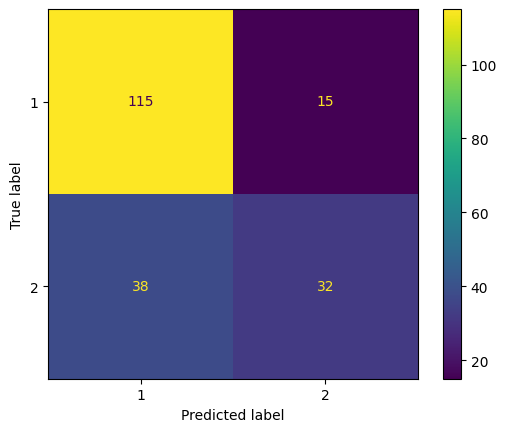

In [4]:
def preprocess_german_data():
    X = []
    Y = []
    with open("german.data-numeric") as data:
        for row in data:
            string = list(map(int, row.split()))
            X.append(string[:-1])
            Y.append(string[-1] - 1)
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

x, y = preprocess_german_data()
n = 200
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=n, random_state=1234)

classificator = Classificator()
classificator.fit(x_train, y_train)
y_res = classificator.predict(x_test)

cm = confusion_matrix(y_test, y_res)
ConfusionMatrixDisplay(cm, display_labels=["1", "2"]).plot()
print(f'm/n P(2|1): {cm[0][1] / (cm[0][0] + cm[0][1])}, P(1|2): {cm[1][0] / (cm[1][0] + cm[1][1])}')
print(f'С помощью метрики и  P(2|1): {classificator.prob_2_1}, P(1|2): {classificator.prob_1_2}')
plt.show()

In [5]:
n1, n2 = 500, 500
mu1, mu2 = np.array([1,2, 3]),  np.array([2,2,3])
cov = np.array([[0.5, 1, 0],
                [1, 2.5, 0],
                [0, 0, 1]])

x1, y1, x2, y2 = np.random.multivariate_normal(mu1, cov, n1), np.zeros(n1), np.random.multivariate_normal(mu2, cov, n2), np.ones(n2)

n = 200
n_components = 2

x_train, x_test, y_train, y_test = train_test_split(PCA_method(np.vstack((x1, x2)), 1), np.hstack((y1, y2)), test_size=n, random_state=1234)

m/n P(2|1): 0.5769230769230769, P(1|2): 0.3958333333333333
Метрика P(2|1): 0.6185774395116671, P(1|2): 0.35867165994896477


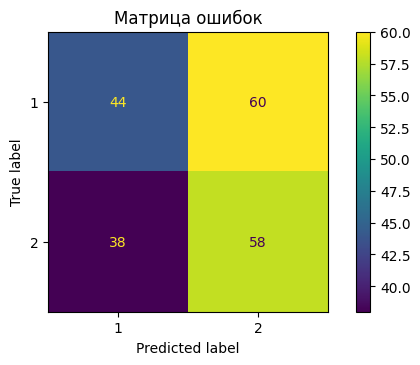

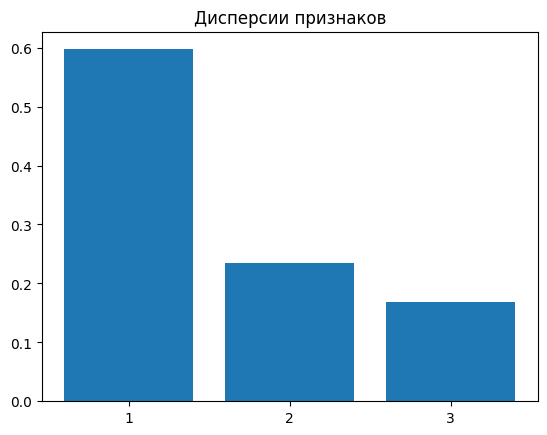

In [6]:
classificator = Classificator()
classificator.fit(x_train, y_train)
y_res = classificator.predict(x_test)
wrong_values_indx = np.where(np.not_equal(y_res, y_test))

fig = plt.figure(figsize=(16,8))
# ax1 = fig.add_subplot(2, 2, 1)
# ax1.set_title('Классификатор')
# ax1.scatter(x_test[:, 0], x_test[:, 1],  color=['r' if i else 'b' for i in y_res])


# ax2 = fig.add_subplot(2, 2, 2)
# ax2.set_title('Реальность')
# ax2.scatter(x_test[:, 0], x_test[:, 1], color=['r' if i else 'b' for i in y_test])


# ax3 = fig.add_subplot(2,2,3)
# ax3.set_title('Реальность (зелёным цветом показаны ошибочные классификации)')
# ax3.scatter(x_test[:, 0], x_test[:, 1],  color=['g' if np.isin(indx, wrong_values_indx) else ['r', 'b'][int(res)] for indx, res in enumerate(y_res)])


ax4 = fig.add_subplot(2,2,4)
ax4.set_title('Матрица ошибок')


cm = confusion_matrix(y_test, y_res)
ConfusionMatrixDisplay(cm, display_labels=["1", "2"]).plot(ax = ax4)
print(f'm/n P(2|1): {cm[0][1] / (cm[0][0] + cm[0][1])}, P(1|2): {cm[1][0] / (cm[1][0] + cm[1][1])}')
print(f'Метрика P(2|1): {classificator.prob_2_1}, P(1|2): {classificator.prob_1_2}')
plt.show()

variances = calc_variance_ratio(np.vstack((x1, x2)), np.vstack((x1, x2)))
plt.bar([str(i) for i in range(1, len(variances) + 1)], variances)
plt.title('Дисперсии признаков')
plt.show()

n_components:  3
m/n P(2|1): 0.05384615384615385, P(1|2): 0.8428571428571429
С помощью метрики и  P(2|1): 0.01986233307149921, P(1|2): 0.9398915064805747


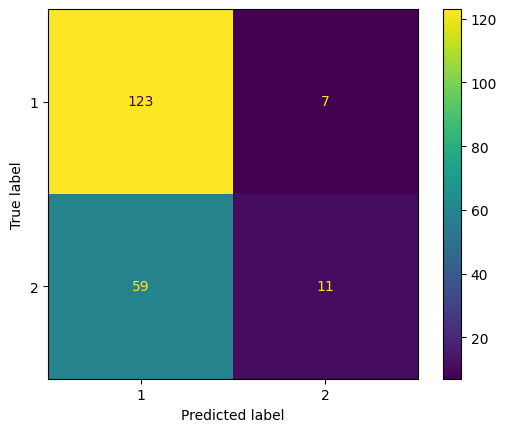

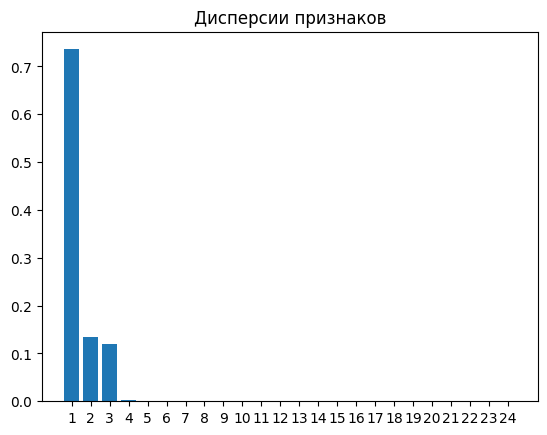

In [7]:

x, y = preprocess_german_data()
n = 200
x_train, x_test, y_train, y_test = train_test_split(PCA_method(x), y, test_size=n, random_state=1234)

classificator = Classificator()
classificator.fit(x_train, y_train)
y_res = classificator.predict(x_test)

cm = confusion_matrix(y_test, y_res)
ConfusionMatrixDisplay(cm, display_labels=["1", "2"]).plot()
print(f'm/n P(2|1): {cm[0][1] / (cm[0][0] + cm[0][1])}, P(1|2): {cm[1][0] / (cm[1][0] + cm[1][1])}')
print(f'С помощью метрики и  P(2|1): {classificator.prob_2_1}, P(1|2): {classificator.prob_1_2}')
plt.show()

variances = calc_variance_ratio(x, x)

plt.bar([str(i) for i in range(1, len(variances) + 1)], variances)
plt.title('Дисперсии признаков')
plt.show()

m/n P(2|1): 0.08461538461538462, P(1|2): 0.5714285714285714
С помощью метрики и  P(2|1): 0.08405153172326751, P(1|2): 0.6144637270061754


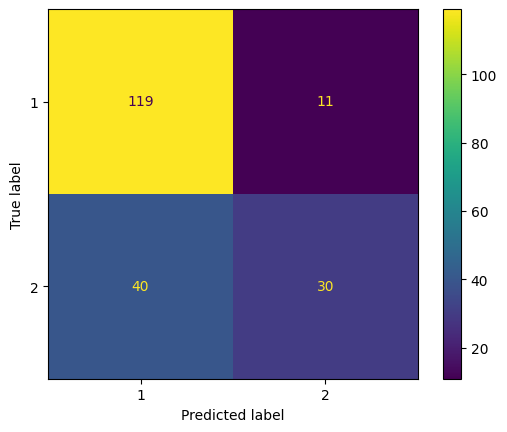

In [8]:
x_train, x_test, y_train, y_test = train_test_split(PCA_method(x, 15), y, test_size=n, random_state=1234)

classificator = Classificator()
classificator.fit(x_train, y_train)
y_res = classificator.predict(x_test)

cm = confusion_matrix(y_test, y_res)
ConfusionMatrixDisplay(cm, display_labels=["1", "2"]).plot()
print(f'm/n P(2|1): {cm[0][1] / (cm[0][0] + cm[0][1])}, P(1|2): {cm[1][0] / (cm[1][0] + cm[1][1])}')
print(f'С помощью метрики и  P(2|1): {classificator.prob_2_1}, P(1|2): {classificator.prob_1_2}')
plt.show()
